In [1]:
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("G:/python/projects/to do/dimond project/diamonds.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.sample(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
6711,6712,0.27,Very Good,E,VS1,60.6,59.0,413,4.19,4.22,2.55
8165,8166,1.01,Premium,G,SI2,62.4,58.0,4362,6.38,6.41,3.99
41581,41582,0.25,Very Good,D,VS1,60.8,60.0,388,4.07,4.09,2.48
10097,10098,1.05,Ideal,E,SI2,60.3,61.0,4714,6.56,6.60,3.97
40607,40608,0.23,Ideal,F,VS2,61.5,55.0,498,3.93,3.97,2.43
2761,2762,0.90,Very Good,I,SI1,63.3,59.0,3251,6.14,6.05,3.86
19792,19793,1.81,Fair,J,SI1,56.2,62.0,8362,8.14,8.09,4.56
48971,48972,0.34,Ideal,I,VS1,62.4,55.0,537,4.47,4.51,2.80
43504,43505,0.43,Premium,F,VVS1,61.5,56.0,1422,4.90,4.86,3.00
31168,31169,0.41,Good,F,SI1,63.3,57.0,755,4.69,4.72,2.98


In [5]:
df.shape

(53940, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
df.drop(['Unnamed: 0'],axis=1,inplace= True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [9]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [10]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [11]:
len(df[df.duplicated()])

146

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [14]:
#we can see that the minimum values of x y and z are eual to zero so we will take a look at them by highlighting 
dictn = {"carat" : "{:.2f}", "depth" : "{:.1f}", "table" : "{:.1f}", "x" : "{:.2f}", "y" : "{:.2f}", "z" : "{:.2f}"}
df0 = df.loc[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]
df0.style.apply(lambda x: ["background: yellow" if n == 0 else "" for n in x], axis = 1).format(dictn)

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.00


In [15]:
# transforming these values to nan values
df.loc [df["x"] == 0 , "x"]= np.nan
df.loc [df["y"] == 0 , "y"]= np.nan
df.loc [df["z"] == 0 , "z"]= np.nan


In [16]:
df[['x','y','z']].isnull().sum()

x     7
y     6
z    19
dtype: int64

In [52]:
df.loc[10,"carat"]
c[0.3]

4.3

In [17]:
# filling null values 
def filling_null_values(col):
    c= df.groupby(["carat"])[col].median()
    idx = list(df.loc[df[col].isnull() == True].sort_values(by = "carat",ascending= False).index)
    for i in idx:
        cv = df.loc[i,"carat"]
        val= c[cv]
        df.loc[i,col] = val
        print('carat: {} / median{} values{}'.format(cv,col,val))
    return df.iloc[idx].style.applymap(lambda x: "background-color: limegreen", subset = col).format(dictn)

In [18]:
#  filling y n values
filling_null_values("y")

carat: 2.25 / mediany values8.39
carat: 1.56 / mediany values7.46
carat: 1.2 / mediany values6.79
carat: 1.14 / mediany values6.72
carat: 1.0 / mediany values6.38
carat: 0.71 / mediany values5.73


,carat,cut,color,clarity,depth,table,price,x,y,z
27494,2.01,Premium,H,SI1,61.7,60.0,18188,8.06,7.96,4.94
24576,1.51,Very Good,G,VS2,63.5,57.0,12872,7.23,7.19,4.58
26303,1.82,Ideal,F,SI1,61.8,58.0,15802,7.80,7.84,4.83
15988,1.01,Good,E,VS2,63.3,60.0,6399,6.30,6.33,4.00
11991,1.04,Ideal,F,SI1,61.2,56.0,5145,6.54,6.60,4.02
49700,0.70,Very Good,I,SI1,62.2,55.0,2147,5.62,5.67,3.51


In [19]:
filling_null_values("x")

carat: 2.25 / medianx values8.47
carat: 1.56 / medianx values7.46
carat: 1.2 / medianx values6.78
carat: 1.14 / medianx values6.71
carat: 1.07 / medianx values6.57
carat: 1.0 / medianx values6.38
carat: 0.71 / medianx values5.72


,carat,cut,color,clarity,depth,table,price,x,y,z
27494,2.01,Premium,H,SI1,61.7,60.0,18188,8.06,7.96,4.94
24576,1.51,Very Good,G,VS2,63.5,57.0,12872,7.23,7.19,4.58
26303,1.82,Ideal,F,SI1,61.8,58.0,15802,7.80,7.84,4.83
15988,1.01,Good,E,VS2,63.3,60.0,6399,6.30,6.33,4.00
11208,1.01,Good,H,VS2,63.5,61.0,4959,6.24,6.32,3.99
11991,1.04,Ideal,F,SI1,61.2,56.0,5145,6.54,6.60,4.02
49700,0.70,Very Good,I,SI1,62.2,55.0,2147,5.62,5.67,3.51


In [20]:
filling_null_values("z")

carat: 2.8 / medianz values5.5
carat: 2.25 / medianz values5.19
carat: 2.25 / medianz values5.19
carat: 2.2 / medianz values5.17
carat: 2.18 / medianz values5.16
carat: 2.02 / medianz values5.0
carat: 1.56 / medianz values4.59
carat: 1.5 / medianz values4.53
carat: 1.2 / medianz values4.21
carat: 1.15 / medianz values4.16
carat: 1.14 / medianz values4.14
carat: 1.12 / medianz values4.11
carat: 1.1 / medianz values4.09
carat: 1.07 / medianz values4.05
carat: 1.01 / medianz values3.98
carat: 1.01 / medianz values3.98
carat: 1.0 / medianz values3.96
carat: 1.0 / medianz values3.96
carat: 0.71 / medianz values3.54


,carat,cut,color,clarity,depth,table,price,x,y,z
27807,0.23,Ideal,F,VVS2,61.6,54.0,650,3.97,3.99,2.45
26183,2.01,Premium,I,SI1,60.9,60.0,15528,8.10,8.06,4.92
27494,2.01,Premium,H,SI1,61.7,60.0,18188,8.06,7.96,4.94
27177,1.50,Good,E,VVS2,64.3,58.0,17449,7.20,7.13,4.61
24450,1.37,Premium,E,VS1,59.4,60.0,12713,7.27,7.20,4.30
27570,2.09,Very Good,H,SI1,61.1,56.0,18392,8.23,8.30,5.05
24576,1.51,Very Good,G,VS2,63.5,57.0,12872,7.23,7.19,4.58
10190,0.95,Very Good,E,SI1,61.6,56.0,4738,6.31,6.36,3.90
26303,1.82,Ideal,F,SI1,61.8,58.0,15802,7.80,7.84,4.83
13632,1.35,Very Good,I,SI2,58.6,63.0,5579,7.28,7.19,4.24


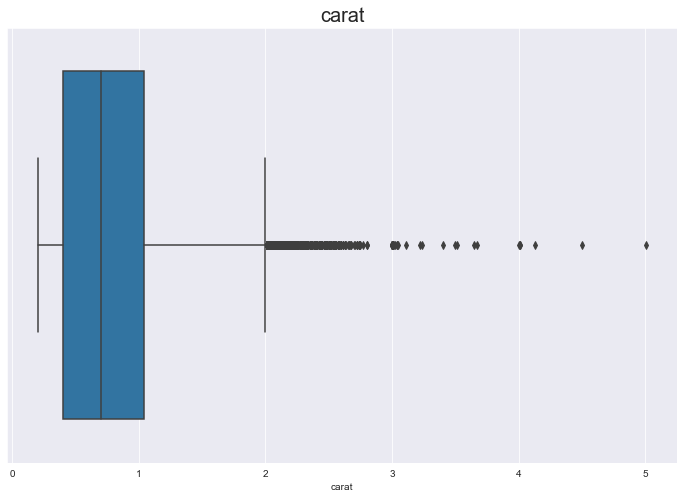

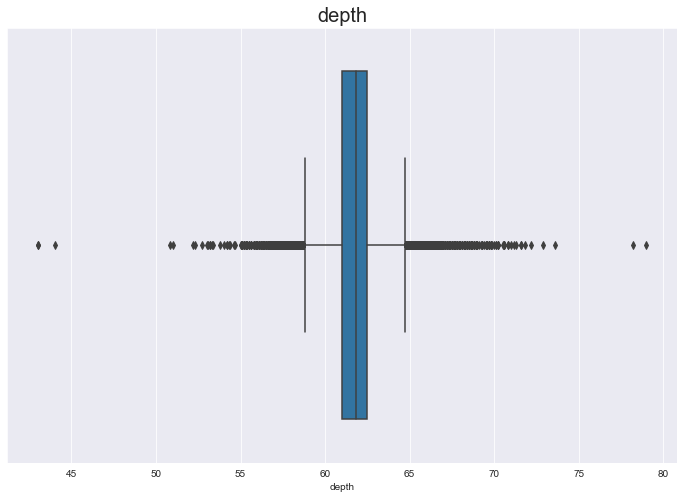

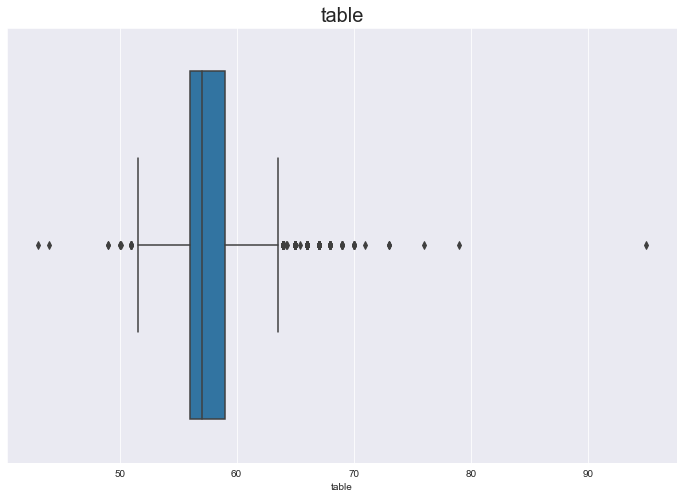

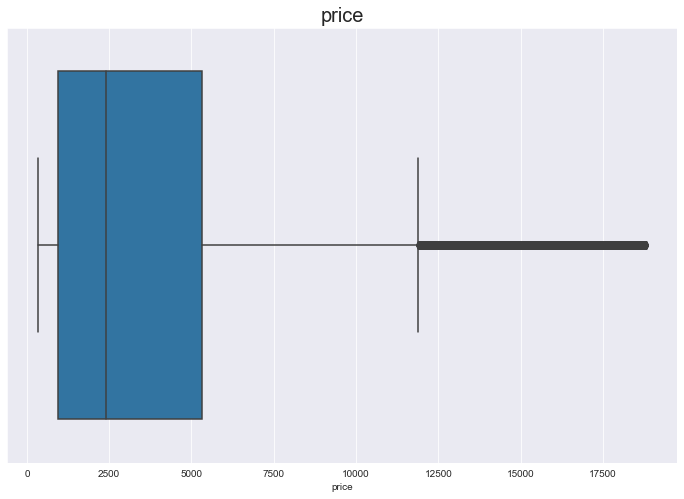

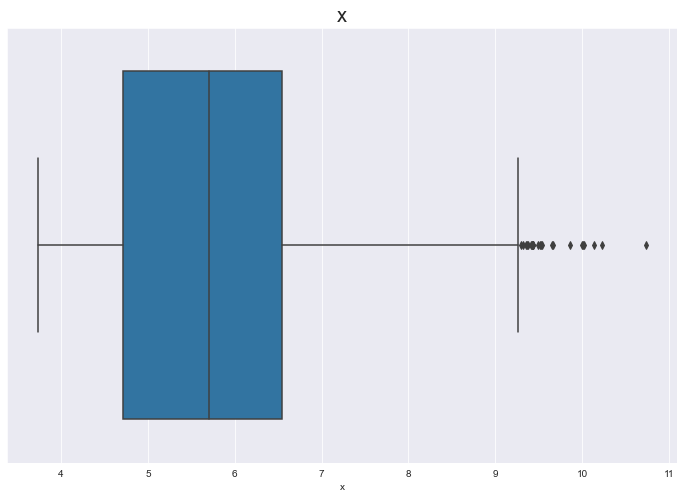

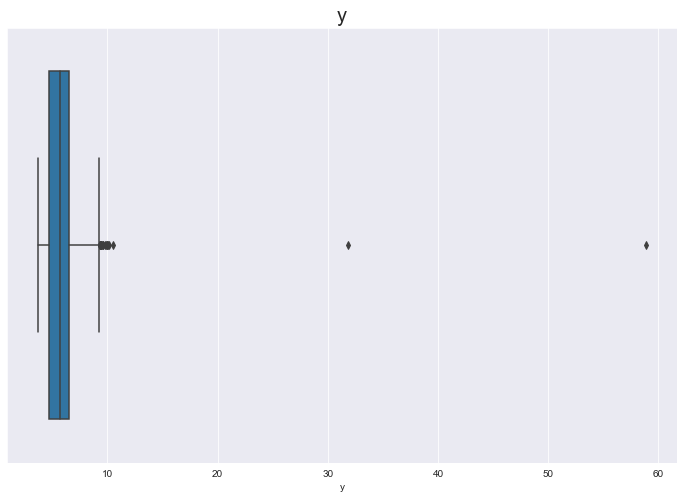

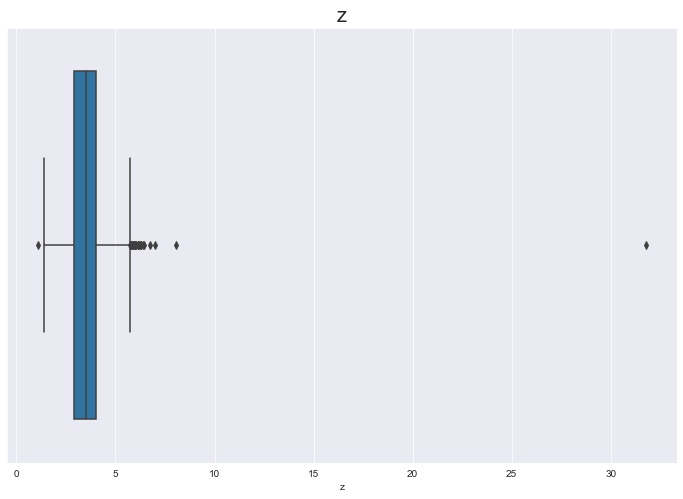

In [21]:
# ploting box plot
for c in ['carat','depth','table','price','x','y','z']:
    plt.figure(figsize=(12,8))
    sns.boxplot(df[c])
    plt.title(c,fontsize=20)
    plt.show( )

In [22]:
# checking outliers
def outliers(out,col):
    out_idx = out.index
    i = pd.IndexSlice[out_idx, col]
    return out.style.applymap(lambda x:'background-color:red'  , subset = i).format(dictn)

In [23]:
df_out = df.loc[df['y'] > 30].copy()
outliers(df_out,'y')

,carat,cut,color,clarity,depth,table,price,x,y,z
24067,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


In [24]:
df_out = df.loc[df['z'] > 30].copy()
outliers(df_out,'z')

,carat,cut,color,clarity,depth,table,price,x,y,z
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


In [25]:
#filling outliers values with np.nan in x and y
df.loc[df["y"] > 30, "y"] = np.nan
df.loc[df["z"] > 30, "z"] = np.nan

In [26]:
#  filling null values 
filling_null_values('y')

carat: 2.0 / mediany values8.01
carat: 0.51 / mediany values5.14


,carat,cut,color,clarity,depth,table,price,x,y,z
24122,2.12,Ideal,H,SI2,61.4,57.0,12284,8.28,8.24,5.07
49332,0.70,Very Good,H,SI2,63.4,55.0,2094,5.59,5.64,3.56


In [27]:
filling_null_values('z')

carat: 0.51 / medianz values3.17


,carat,cut,color,clarity,depth,table,price,x,y,z
48552,0.55,Ideal,D,VS1,61.7,55.0,1990,5.26,5.25,3.24


In [28]:
#checking outiers in depth column 
df_out = df.loc[(df["depth"] > 75) | (df["depth"] < 45)].copy()
outliers(df_out, "depth")

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
41918,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [29]:
# outliers in table
df_out = df.loc[(df["table"] > 90) | (df["depth"] < 45)].copy()
outliers(df_out, "table")

,carat,cut,color,clarity,depth,table,price,x,y,z
4518,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6341,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
24932,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [30]:
# z column outrliers
df_out = df.loc[df["z"] < 2].copy()
outliers(df_out, "z")

,carat,cut,color,clarity,depth,table,price,x,y,z
14635,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
20694,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53
21654,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41


In [31]:
df.loc[df["carat"] == df["z"], ["carat", "z"]]

,carat,z
14635,1.07,1.07
20694,1.53,1.53
21654,1.41,1.41


In [32]:
df.loc[df['z']< 2 ,'z']= np.nan

In [33]:
filling_null_values('z')

carat: 1.53 / medianz values4.56
carat: 1.41 / medianz values4.44
carat: 1.07 / medianz values4.05


,carat,cut,color,clarity,depth,table,price,x,y,z
20737,1.40,Ideal,H,VS2,63.0,56.0,8977,7.13,7.07,4.47
21699,0.34,Ideal,D,SI1,60.6,56.0,626,4.51,4.54,2.74
14668,1.51,Fair,F,SI2,65.4,56.0,5919,7.20,7.08,4.67


Text(0, 0.5, 'price')

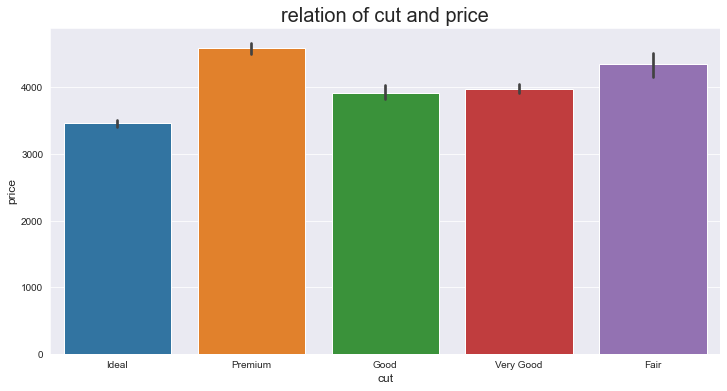

In [34]:
# bar pat of cut and price
plt.figure(figsize=(12,6))
sns.barplot(x= 'cut',y ='price', data= df)
plt.title('relation of cut and price', fontsize=20);
plt.xlabel('cut', fontsize=12)
plt.ylabel('price', fontsize=12)

In [35]:
# checking correction of price column with other columns
df.corr()['price'].sort_values(ascending=False )[1:]

carat    0.921548
y        0.888703
x        0.887114
z        0.882251
table    0.126566
depth   -0.011048
Name: price, dtype: float64

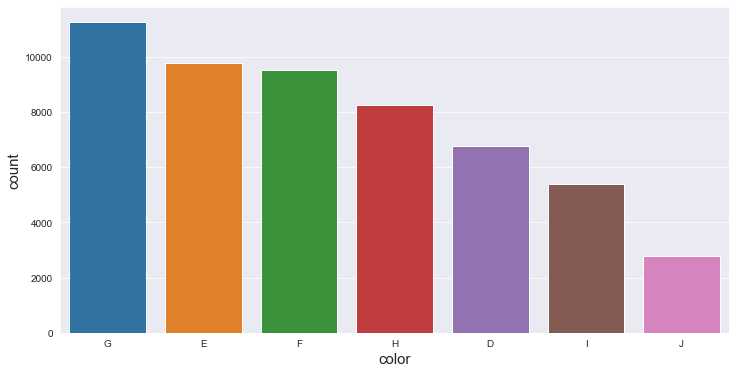

In [36]:
color_label =   df.color.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(color_label.index, color_label);
plt.ylabel('count', fontsize=15)
plt.xlabel('color',fontsize=15);

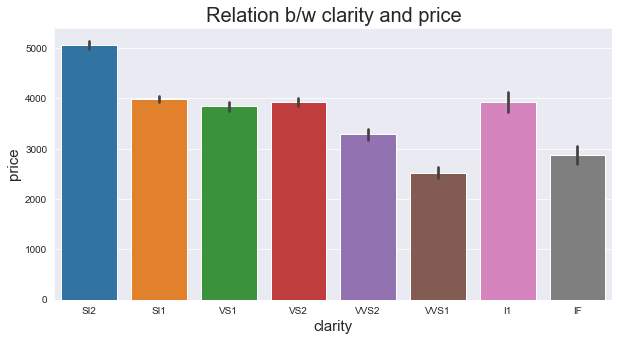

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x='clarity', y='price', data=df);
plt.title('Relation b/w clarity and price', fontsize=20)
plt.xlabel('clarity', fontsize=15)
plt.ylabel('price', fontsize=15); 

In [38]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df[['price']]

In [39]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [40]:
y.head()

,price
0,326
1,326
2,327
3,334
4,335


In [41]:
#one-hot encoding
X_copy = X.copy()

X_copy = pd.get_dummies(data=X_copy, columns=['clarity', 'color', 'cut'], prefix=['clarity', 'color', 'cut'], 
                        drop_first=True).copy()

In [42]:
X_copy.head()

,carat,depth,table,x,y,z,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,...,color_E,color_F,color_G,color_H,color_I,color_J,cut_Good,cut_Ideal,cut_Premium,cut_Very Good
0,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0.23,56.9,65.0,4.05,4.07,2.31,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.31,63.3,58.0,4.34,4.35,2.75,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [43]:
#scaling
sc = StandardScaler()

X_copy = sc.fit_transform(X_copy)

In [44]:
# k-fold correlation 
cv = KFold(n_splits=10, random_state=0, shuffle = True)

In [45]:
matrix = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]
scores = {"train" : [], "test" : [], "mae" : [], "mse" : [], "rmse" : []}

In [46]:
def result(model, f):
    sc = cross_validate(model, f, y, cv=cv, scoring=matrix, return_train_score=True)
    
    train_s = sc["train_r2"].mean()
    scores["train"].append(train_s)
    
    test_s = sc["test_r2"].mean()
    scores["test"].append(test_s)
    
    ''' mae '''
    mae = np.absolute(sc["test_neg_mean_absolute_error"]).mean()
    scores["mae"].append(mae)
    
    ''' scorese '''
    mse = np.absolute(sc["test_neg_mean_squared_error"]).mean()
    scores["mse"].append(mse)
    
    ''' rscorese '''
    rmse = np.sqrt(mse)
    scores["rmse"].append(rmse)
    print("train score: {0:.4f}\nR2 score: {1:.4f}\nMAE: {2:.2f}\nscoresE: {3:.2f}\nRscoresE: {4:.2f}".format(train_s, test_s, 
                                                                                                      mae, mse, rmse))

In [47]:
''' linear regression '''

linear_reg = LinearRegression()h
result(linear_reg, X_copy)

SyntaxError: invalid syntax (531080757.py, line 3)

In [ ]:
# XGBRegressor
xgb = XGBRegressor(learning_rate = 0.1, n_estimators = 200, random_state=0)
result(xgb, X_copy)

In [ ]:
# random forest regreesor
rf= RandomForestRegressor(max_depth= 8, n_estimators=400, random_state=0)
result(rf,X_copy)

In [ ]:
# decisionTreeregressor
dt= DecisionTreeRegressor(max_depth=9,random_state=0)
result(dt,X_copy)